In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
%store -r subjects
%store -r eeg_final
%store -r stimulus
%store -r master_df

In [53]:
master_df.columns

Index(['Unnamed: 0', 'id', 'indra_time', 'browser_latency', 'reading_time',
       'attention_esense', 'meditation_esense', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'label', 'delta', 'theta',
       'low_alpha', 'high_alpha', 'low_beta', 'high_beta', 'low_gamma',
       'mid+gamma', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts'],
      dtype='object')

# Relabel everything into Broader categories

In [54]:
math_labels = ['math1','math2','math3','math4','math5','math6','math7',
               'math8','math9','math10','math11','math12']
colour_labels = ['colorRound1-1', 'colorRound1-2', 'colorRound1-3', 'colorRound1-4',
       'colorRound1-5', 'colorRound1-6', 'colorRound2-1',
       'colorRound2-2', 'colorRound2-3', 'colorRound2-4', 'colorRound2-5',
       'colorRound2-6', 'readyRound3', 'colorRound3-1', 'colorRound3-2',
       'colorRound3-3', 'colorRound3-4', 'colorRound3-5', 'colorRound3-6', 'colorRound4-1', 'colorRound4-2', 'colorRound4-3',
       'colorRound4-4', 'colorRound4-5', 'colorRound4-6',
       'colorRound5-1', 'colorRound5-2', 'colorRound5-3', 'colorRound5-4',
       'colorRound5-5', 'colorRound5-6']
blink_labels = ['blink1', 'blink2', 'blink3','blink4', 'blink5']
video_labels = ['video-ver1','video-ver2']
items_labels = ['thinkOfItems-ver1','thinkOfItems-ver2',]

In [55]:
master_df.loc[master_df['label'].isin(math_labels), 'label'] = 'math'
master_df.loc[master_df['label'].isin(colour_labels), 'label'] = 'colour'
master_df.loc[master_df['label'].isin(blink_labels), 'label'] = 'blink'
master_df.loc[master_df['label'].isin(video_labels), 'label'] = 'video'
master_df.loc[master_df['label'].isin(items_labels), 'label'] = 'items'

In [56]:
master_df.label.unique()

array(['unlabeled', 'blinkInstruction', 'blink', 'relaxInstruction',
       'relax', 'mathInstruction', 'math', 'musicInstruction', 'music',
       'videoInstruction', 'video', 'thinkOfItemsInstruction-ver1',
       'items', 'colorInstruction1', 'colorInstruction2', 'readyRound1',
       'colour', 'readyRound2', 'readyRound4', 'readyRound5',
       'thinkOfItemsInstruction-ver2'], dtype=object)

In [57]:
useless_labels = ['unlabeled', 'blinkInstruction', 'relaxInstruction',
        'mathInstruction', 'musicInstruction',
       'videoInstruction', 'thinkOfItemsInstruction-ver1',
        'colorInstruction1', 'colorInstruction2', 'readyRound1',
        'readyRound2', 'readyRound4', 'readyRound5',
       'thinkOfItemsInstruction-ver2']

In [58]:
master_label_df = master_df[~master_df['label'].isin(useless_labels)] 

In [59]:
master_label_df.label.unique()
# We have now numbered down our labels into broader 
# but hopefully more differentiated labels!!!

array(['blink', 'relax', 'math', 'music', 'video', 'items', 'colour'],
      dtype=object)

In [60]:
master_label_df.count()
# unfortunately our number of records has reduced quite a bit :\

Unnamed: 0            7406
id                    7406
indra_time            7406
browser_latency       7406
reading_time          7406
attention_esense      7406
meditation_esense     7406
eeg_power             7406
raw_values            7406
signal_quality        7406
createdAt             7406
updatedAt             7406
label                 7406
delta                 7406
theta                 7406
low_alpha             7406
high_alpha            7406
low_beta              7406
high_beta             7406
low_gamma             7406
mid+gamma             7406
Session               7406
Seen video before?    7406
Chosen color          7406
Saw icons?            7406
Gender                7406
Wear contacts         7406
dtype: int64

In [61]:
%store master_label_df

Stored 'master_label_df' (DataFrame)


# Retry our KNN with new dataset

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
features = master_label_df.drop(['Unnamed: 0', 'id', 'indra_time','reading_time', 'browser_latency', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts','label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features,master_label_df['label'],
                                                    test_size=0.30)

In [64]:
features.columns

Index(['attention_esense', 'meditation_esense', 'delta', 'theta', 'low_alpha',
       'high_alpha', 'low_beta', 'high_beta', 'low_gamma', 'mid+gamma'],
      dtype='object')

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
pred = knn.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(confusion_matrix(y_test,pred))

[[  7  50   4   6   3   1   5]
 [ 33 451  56  58  37  40  43]
 [  7 150  41  19  20  30  18]
 [ 15 140  28  44  25  16  10]
 [  9 149  21  24  35  35  16]
 [  4 143  35  22  21  36  15]
 [ 10 165  33  21  23  21  27]]


In [70]:
print(classification_report(y_test,pred))

#Well that was horrible 

              precision    recall  f1-score   support

       blink       0.08      0.09      0.09        76
      colour       0.36      0.63      0.46       718
       items       0.19      0.14      0.16       285
        math       0.23      0.16      0.19       278
       music       0.21      0.12      0.15       289
       relax       0.20      0.13      0.16       276
       video       0.20      0.09      0.12       300

    accuracy                           0.29      2222
   macro avg       0.21      0.19      0.19      2222
weighted avg       0.25      0.29      0.25      2222



# Optimizing KNN

In [71]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

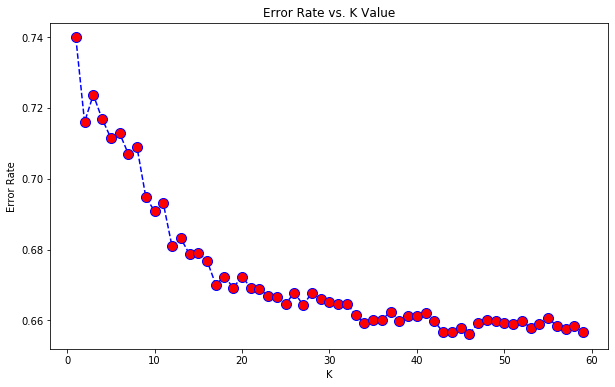

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [73]:
#K = 15
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=40')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

#little higher accuracy but still really bad 

WITH K=40


[[  0  71   1   0   0   3   1]
 [  0 672   7  21   8   9   1]
 [  0 222  19   8  15  15   6]
 [  0 223   4  22  18   6   5]
 [  0 221  10  12  15  26   5]
 [  0 218  11  11  12  20   4]
 [  0 254  10  13  12   6   5]]


              precision    recall  f1-score   support

       blink       0.00      0.00      0.00        76
      colour       0.36      0.94      0.52       718
       items       0.31      0.07      0.11       285
        math       0.25      0.08      0.12       278
       music       0.19      0.05      0.08       289
       relax       0.24      0.07      0.11       276
       video       0.19      0.02      0.03       300

    accuracy                           0.34      2222
   macro avg       0.22      0.17      0.14      2222
weighted avg       0.27      0.34      0.22      2222



C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Retry with Just Wavelengths

In [74]:
features = master_label_df.drop(['Unnamed: 0', 'id', 'indra_time','reading_time', 'browser_latency', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts','label','attention_esense','meditation_esense'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features,master_label_df['label'], test_size=0.30)

In [75]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       blink       0.12      0.12      0.12        68
      colour       0.39      0.65      0.49       741
       items       0.19      0.14      0.16       290
        math       0.19      0.16      0.17       252
       music       0.20      0.13      0.16       278
       relax       0.17      0.09      0.12       298
       video       0.15      0.06      0.09       295

    accuracy                           0.30      2222
   macro avg       0.20      0.19      0.19      2222
weighted avg       0.25      0.30      0.25      2222



Even Worse

# Plot  Different Labels on Graph

In [76]:
#let's visualize the differences in the labels 
master_label_df.columns

Index(['Unnamed: 0', 'id', 'indra_time', 'browser_latency', 'reading_time',
       'attention_esense', 'meditation_esense', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'label', 'delta', 'theta',
       'low_alpha', 'high_alpha', 'low_beta', 'high_beta', 'low_gamma',
       'mid+gamma', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts'],
      dtype='object')

In [77]:
master_time = master_label_df.drop(['Unnamed: 0','reading_time', 'browser_latency', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts'], axis = 1)

In [78]:
master_time.columns
#we are going to plot each wave as a time seriesto look for visual differences

Index(['id', 'indra_time', 'attention_esense', 'meditation_esense', 'label',
       'delta', 'theta', 'low_alpha', 'high_alpha', 'low_beta', 'high_beta',
       'low_gamma', 'mid+gamma'],
      dtype='object')

In [79]:
master_time

,id,indra_time,attention_esense,meditation_esense,label,delta,theta,low_alpha,high_alpha,low_beta,high_beta,low_gamma,mid+gamma
677,8,2015-05-09 23:32:41.663,64,67,blink,741016.0,1068203.0,253428.0,112710.0,171571.0,138093.0,19539.0,13687.0
678,8,2015-05-09 23:32:42.571,80,83,blink,9416.0,13022.0,18955.0,15597.0,8903.0,20473.0,5763.0,7271.0
679,8,2015-05-09 23:32:43.481,90,90,blink,116550.0,7062.0,10241.0,2245.0,4162.0,6597.0,1435.0,4858.0
680,8,2015-05-09 23:32:44.698,93,83,blink,13884.0,5769.0,8625.0,1837.0,6221.0,22838.0,11360.0,13625.0
681,8,2015-05-09 23:32:45.609,91,90,blink,701748.0,51032.0,24760.0,6768.0,3128.0,8376.0,4160.0,3705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26443,27,2015-05-09 23:48:48.296,84,29,colour,34004.0,9627.0,3836.0,9513.0,8240.0,80781.0,39374.0,16310.0
26444,27,2015-05-09 23:48:49.516,74,20,colour,1602302.0,202666.0,40488.0,38347.0,5081.0,26990.0,21178.0,15716.0
26445,27,2015-05-09 23:48:50.433,67,23,colour,634272.0,336226.0,67494.0,17244.0,8897.0,33338.0,49510.0,12804.0
26446,27,2015-05-09 23:48:51.346,66,24,colour,109181.0,46985.0,15022.0,17584.0,15259.0,124133.0,19728.0,11153.0


In [80]:
master_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 677 to 26447
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 7406 non-null   int64         
 1   indra_time         7406 non-null   datetime64[ns]
 2   attention_esense   7406 non-null   int64         
 3   meditation_esense  7406 non-null   int64         
 4   label              7406 non-null   object        
 5   delta              7406 non-null   float64       
 6   theta              7406 non-null   float64       
 7   low_alpha          7406 non-null   float64       
 8   high_alpha         7406 non-null   float64       
 9   low_beta           7406 non-null   float64       
 10  high_beta          7406 non-null   float64       
 11  low_gamma          7406 non-null   float64       
 12  mid+gamma          7406 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory

In [81]:
master_time = master_time.set_index('indra_time')


In [82]:
master_time

,id,attention_esense,meditation_esense,label,delta,theta,low_alpha,high_alpha,low_beta,high_beta,low_gamma,mid+gamma
indra_time,,,,,,,,,,,,
2015-05-09 23:32:41.663,8,64,67,blink,741016.0,1068203.0,253428.0,112710.0,171571.0,138093.0,19539.0,13687.0
2015-05-09 23:32:42.571,8,80,83,blink,9416.0,13022.0,18955.0,15597.0,8903.0,20473.0,5763.0,7271.0
2015-05-09 23:32:43.481,8,90,90,blink,116550.0,7062.0,10241.0,2245.0,4162.0,6597.0,1435.0,4858.0
2015-05-09 23:32:44.698,8,93,83,blink,13884.0,5769.0,8625.0,1837.0,6221.0,22838.0,11360.0,13625.0
2015-05-09 23:32:45.609,8,91,90,blink,701748.0,51032.0,24760.0,6768.0,3128.0,8376.0,4160.0,3705.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-09 23:48:48.296,27,84,29,colour,34004.0,9627.0,3836.0,9513.0,8240.0,80781.0,39374.0,16310.0
2015-05-09 23:48:49.516,27,74,20,colour,1602302.0,202666.0,40488.0,38347.0,5081.0,26990.0,21178.0,15716.0
2015-05-09 23:48:50.433,27,67,23,colour,634272.0,336226.0,67494.0,17244.0,8897.0,33338.0,49510.0,12804.0


In [83]:
master_time.id.unique()

array([ 8, 12,  5,  2,  4, 14,  9, 15, 13, 10,  6,  3, 11,  1,  7, 24, 25,
       20, 28, 30, 26, 22, 16, 17, 23, 19, 29, 18, 21, 27], dtype=int64)

In [84]:
%store master_time

Stored 'master_time' (DataFrame)


# Visualize Data as Time Series

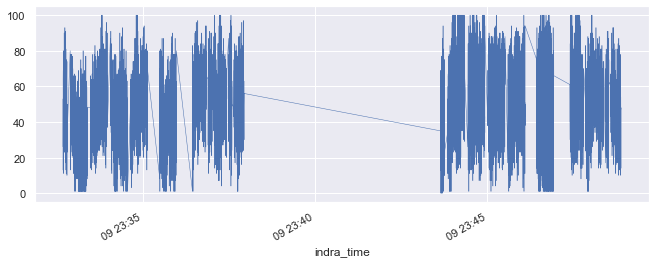

In [85]:
sns.set(rc={'figure.figsize':(11, 4)})
master_time['attention_esense'].plot(linewidth = 0.5)
#master_time['delta'].plot(linewidth = 0.5)


C:\Users\Seran\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


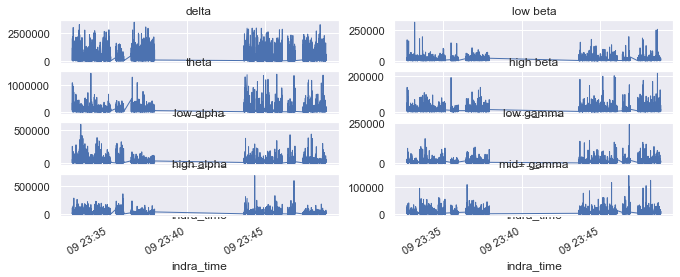

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# master_time['attention_esense'].plot(linewidth = 0.5, ax = axes[0,0])
# axes[0,0].set_title('attention_esense')
# master_time['meditation_esense'].plot(linewidth = 0.5, ax = axes[0,1])
# axes[0,0].set_title('attention_esense')
master_time['delta'].plot(linewidth = 1, ax = axes[0,0])
axes[0,0].set_title('delta')
master_time['theta'].plot(linewidth = 1, ax = axes[1,0])
axes[1,0].set_title('theta')
master_time['low_alpha'].plot(linewidth = 1, ax = axes[2,0])
axes[2,0].set_title('low alpha')
master_time['high_alpha'].plot(linewidth = 1, ax = axes[3,0])
axes[3,0].set_title('high alpha')
master_time['low_beta'].plot(linewidth = 1, ax = axes[0,1])
axes[0,1].set_title('low beta')
master_time['high_beta'].plot(linewidth = 1, ax = axes[1,1])
axes[1,1].set_title('high beta')
master_time['low_gamma'].plot(linewidth = 1, ax = axes[2,1])
axes[2,1].set_title('low gamma')
master_time['mid+gamma'].plot(linewidth = 1, ax = axes[3,1])
axes[3,1].set_title('mid+ gamma')
fig.tight_layout(pad = 3.0)

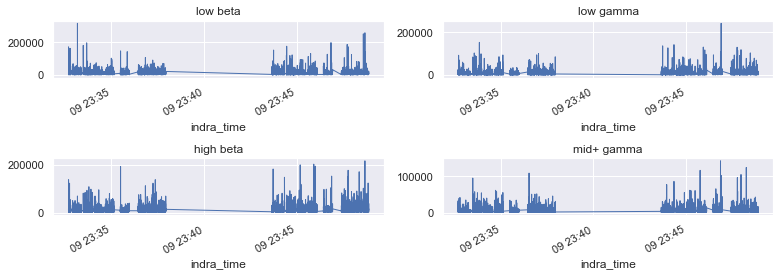

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# master_time['delta'].plot(linewidth = 1, ax = axes[0,0])
# axes[0,0].set_title('delta')
# master_time['theta'].plot(linewidth = 1, ax = axes[1,0])
# axes[1,0].set_title('theta')
# master_time['low_alpha'].plot(linewidth = 1, ax = axes[0,1])
# axes[0,1].set_title('low alpha')
# master_time['high_alpha'].plot(linewidth = 1, ax = axes[1,1])
# axes[1,1].set_title('high alpha')
master_time['low_beta'].plot(linewidth = 1, ax = axes[0,0])
axes[0,0].set_title('low beta')
master_time['high_beta'].plot(linewidth = 1, ax = axes[1,0])
axes[1,0].set_title('high beta')
master_time['low_gamma'].plot(linewidth = 1, ax = axes[0,1])
axes[0,1].set_title('low gamma')
master_time['mid+gamma'].plot(linewidth = 1, ax = axes[1,1])
axes[1,1].set_title('mid+ gamma')
fig.tight_layout()

# Look at just one subject accuracy

In [140]:
time_1 = master_time.loc[master_time['id'] == 1]
time_1.label.unique()

array(['blink', 'relax', 'math', 'music', 'video', 'items', 'colour'],
      dtype=object)

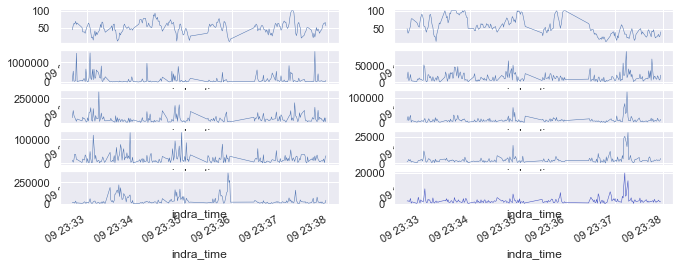

In [121]:
ig, axes = plt.subplots(nrows=5, ncols=2)
time_1['attention_esense'].plot(linewidth = 0.5, ax = axes[0,0])
time_1['meditation_esense'].plot(linewidth = 0.5, ax = axes[0,1])
time_1['delta'].plot(linewidth = 0.5, ax = axes[1,0])
time_1['theta'].plot(linewidth = 0.5, ax = axes[2,0])
time_1['low_alpha'].plot(linewidth = 0.5, ax = axes[3,0])
time_1['high_alpha'].plot(linewidth = 0.5, ax = axes[4,0])
time_1['low_beta'].plot(linewidth = 0.5, ax = axes[1,1])
time_1['high_beta'].plot(linewidth = 0.5, ax = axes[2,1])
time_1['low_gamma'].plot(linewidth = 0.5, ax = axes[3,1])
time_1['mid+gamma'].plot(linewidth = 0.5, ax = axes[4,1], colormap = 'coolwarm')


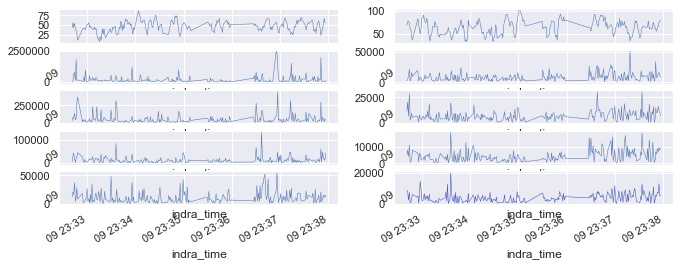

In [122]:
time_2 = master_time.loc[master_time['id'] == 2]
ig, axes = plt.subplots(nrows=5, ncols=2)
time_2['attention_esense'].plot(linewidth = 0.5, ax = axes[0,0])
time_2['meditation_esense'].plot(linewidth = 0.5, ax = axes[0,1])
time_2['delta'].plot(linewidth = 0.5, ax = axes[1,0])
time_2['theta'].plot(linewidth = 0.5, ax = axes[2,0])
time_2['low_alpha'].plot(linewidth = 0.5, ax = axes[3,0])
time_2['high_alpha'].plot(linewidth = 0.5, ax = axes[4,0])
time_2['low_beta'].plot(linewidth = 0.5, ax = axes[1,1])
time_2['high_beta'].plot(linewidth = 0.5, ax = axes[2,1])
time_2['low_gamma'].plot(linewidth = 0.5, ax = axes[3,1])
time_2['mid+gamma'].plot(linewidth = 0.5, ax = axes[4,1], colormap = 'coolwarm')

Just based on the above two subjects you can see that the EEGs are significantly different across the same activities. But at the same time you can see that there are similar peaks and troughs across them. This may indicate that we might need to try and classify on a subject by subject level because the EEGs don't correlate across people. Especially not with sample sizes as low as this. 

In [142]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)

In [137]:
accuracy_list = []
for i in range(1,31):
    subject = master_time[master_time['id'] == i]
    features = subject.drop(['id', 'label'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(features,subject['label'],
                                                    test_size=0.30)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'Subject {i} Results with accuracy of {round(accuracy,3)} \n')
    print(classification_report(y_test,pred))
    accuracy_list.append(accuracy)

Subject 1 Results with accuracy of 0.333 

              precision    recall  f1-score   support

       blink       0.00      0.00      0.00         2
      colour       0.45      0.58      0.51        26
       items       0.17      0.14      0.15         7
        math       0.36      0.45      0.40        11
       music       0.10      0.12      0.11         8
       relax       0.25      0.29      0.27         7
       video       0.00      0.00      0.00        11

    accuracy                           0.33        72
   macro avg       0.19      0.23      0.21        72
weighted avg       0.27      0.33      0.30        72

Subject 2 Results with accuracy of 0.329 

              precision    recall  f1-score   support

       blink       0.00      0.00      0.00         2
      colour       0.42      0.68      0.52        25
       items       0.50      0.18      0.27        11
        math       0.15      0.22      0.18         9
       music       0.33      0.29      0.31   

C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

       blink       0.00      0.00      0.00         2
      colour       0.42      0.41      0.41        32
       items       0.33      0.12      0.18         8
        math       0.12      0.17      0.14         6
       music       0.17      0.33      0.22         6
       relax       0.00      0.00      0.00         8
       video       0.29      0.20      0.24        10

    accuracy                           0.26        72
   macro avg       0.19      0.18      0.17        72
weighted avg       0.29      0.26      0.27        72

Subject 17 Results with accuracy of 0.306 

              precision    recall  f1-score   support

       blink       0.00      0.00      0.00         2
      colour       0.33      0.65      0.44        23
       items       0.45      0.71      0.56         7
        math       0.20      0.12      0.15         8
       music       0.00      0.00      0.00        13
       relax       0.00      0.00 

C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
# Find average accuracy 
sum(accuracy_list)/len(accuracy_list)

0.33321931424372486

Still horrible accuracy, maybe try with cross validation?

## Cross Validation - Per Subject

In [162]:
knn = KNeighborsClassifier(n_neighbors=15)
accuracy_list = []
for i in range(1,31):
    subject = master_time[master_time['id'] == i]
    features = subject.drop(['id', 'label'], axis = 1)
    scores = cross_val_score(knn, features, subject['label'], 
                             cv = 10, scoring = 'accuracy')  
    mean_score = scores.mean()
    print(f'Subject {i} Results with CV accuracy of {mean_score} \n')
    print(scores)
    print(mean_score)
    accuracy_list.append(mean_score)

C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Subject 1 Results with CV accuracy of 0.42228260869565215 

[0.33333333 0.375      0.375      0.5        0.54166667 0.54166667
 0.41666667 0.41666667 0.375      0.34782609]
0.42228260869565215
Subject 2 Results with CV accuracy of 0.33016666666666666 

[0.36       0.4        0.33333333 0.33333333 0.29166667 0.33333333
 0.33333333 0.25       0.20833333 0.45833333]
0.33016666666666666
Subject 3 Results with CV accuracy of 0.34 

[0.2  0.44 0.36 0.36 0.44 0.44 0.4  0.32 0.24 0.2 ]
0.34
Subject 4 Results with CV accuracy of 0.3666666666666667 

[0.41666667 0.45833333 0.45833333 0.5        0.375      0.29166667
 0.29166667 0.25       0.20833333 0.41666667]
0.3666666666666667
Subject 5 Results with CV accuracy of 0.409963768115942 

[0.33333333 0.45833333 0.45833333 0.5        0.33333333 0.5
 0.29166667 0.45833333 0.375      0.39130435]
0.409963768115942


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Subject 6 Results with CV accuracy of 0.3 

[0.20833333 0.33333333 0.375      0.25       0.25       0.33333333
 0.29166667 0.20833333 0.375      0.375     ]
0.3
Subject 7 Results with CV accuracy of 0.425 

[0.29166667 0.29166667 0.375      0.45833333 0.45833333 0.54166667
 0.5        0.45833333 0.45833333 0.41666667]
0.425
Subject 8 Results with CV accuracy of 0.34057971014492755 

[0.45833333 0.375      0.41666667 0.29166667 0.29166667 0.33333333
 0.16666667 0.33333333 0.34782609 0.39130435]
0.34057971014492755
Subject 9 Results with CV accuracy of 0.3291666666666667 

[0.33333333 0.33333333 0.375      0.41666667 0.25       0.33333333
 0.375      0.25       0.29166667 0.33333333]
0.3291666666666667
Subject 10 Results with CV accuracy of 0.4208333333333334 



C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The l

[0.16666667 0.41666667 0.54166667 0.375      0.41666667 0.375
 0.54166667 0.375      0.45833333 0.54166667]
0.4208333333333334
Subject 11 Results with CV accuracy of 0.3916666666666667 

[0.29166667 0.29166667 0.58333333 0.375      0.29166667 0.375
 0.41666667 0.41666667 0.41666667 0.45833333]
0.3916666666666667
Subject 12 Results with CV accuracy of 0.3233695652173913 

[0.33333333 0.33333333 0.375      0.25       0.33333333 0.25
 0.375      0.375      0.26086957 0.34782609]
0.3233695652173913
Subject 13 Results with CV accuracy of 0.4833333333333334 

[0.375      0.41666667 0.58333333 0.45833333 0.33333333 0.45833333
 0.54166667 0.54166667 0.625      0.5       ]
0.4833333333333334
Subject 14 Results with CV accuracy of 0.34746376811594204 

[0.20833333 0.33333333 0.375      0.29166667 0.33333333 0.29166667
 0.45833333 0.41666667 0.375      0.39130435]
0.34746376811594204


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Subject 15 Results with CV accuracy of 0.35706521739130437 

[0.29166667 0.33333333 0.33333333 0.5        0.41666667 0.43478261
 0.34782609 0.26086957 0.34782609 0.30434783]
0.35706521739130437
Subject 16 Results with CV accuracy of 0.3123188405797102 

[0.29166667 0.16666667 0.29166667 0.45833333 0.25       0.41666667
 0.29166667 0.30434783 0.34782609 0.30434783]
0.3123188405797102
Subject 17 Results with CV accuracy of 0.35561594202898544 

[0.375      0.25       0.375      0.33333333 0.375      0.41666667
 0.33333333 0.25       0.5        0.34782609]
0.35561594202898544
Subject 18 Results with CV accuracy of 0.3976449275362319 

[0.33333333 0.375      0.41666667 0.45833333 0.375      0.375
 0.5        0.29166667 0.41666667 0.43478261]
0.3976449275362319


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Subject 19 Results with CV accuracy of 0.4525 

[0.6        0.36       0.44       0.54166667 0.45833333 0.41666667
 0.41666667 0.45833333 0.41666667 0.41666667]
0.4525
Subject 20 Results with CV accuracy of 0.36594202898550726 

[0.29166667 0.29166667 0.41666667 0.33333333 0.41666667 0.375
 0.375      0.33333333 0.39130435 0.43478261]
0.36594202898550726
Subject 21 Results with CV accuracy of 0.31068840579710144 

[0.41666667 0.29166667 0.33333333 0.29166667 0.20833333 0.33333333
 0.33333333 0.33333333 0.2173913  0.34782609]
0.31068840579710144
Subject 22 Results with CV accuracy of 0.40362318840579714 

[0.33333333 0.41666667 0.5        0.5        0.29166667 0.375
 0.375      0.375      0.43478261 0.43478261]
0.40362318840579714


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Subject 23 Results with CV accuracy of 0.3235507246376811 

[0.33333333 0.20833333 0.375      0.33333333 0.33333333 0.41666667
 0.33333333 0.25       0.39130435 0.26086957]
0.3235507246376811
Subject 24 Results with CV accuracy of 0.34094202898550724 

[0.33333333 0.20833333 0.29166667 0.33333333 0.33333333 0.375
 0.33333333 0.375      0.43478261 0.39130435]
0.34094202898550724
Subject 25 Results with CV accuracy of 0.3175889328063241 

[0.34782609 0.34782609 0.26086957 0.30434783 0.34782609 0.30434783
 0.2173913  0.45454545 0.31818182 0.27272727]
0.3175889328063241
Subject 26 Results with CV accuracy of 0.4111666666666666 

[0.32       0.5        0.33333333 0.45833333 0.5        0.375
 0.45833333 0.5        0.29166667 0.375     ]
0.4111666666666666


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Subject 27 Results with CV accuracy of 0.3295289855072464 

[0.29166667 0.375      0.33333333 0.29166667 0.375      0.25
 0.29166667 0.43478261 0.30434783 0.34782609]
0.3295289855072464
Subject 28 Results with CV accuracy of 0.29275362318840575 

[0.29166667 0.375      0.29166667 0.29166667 0.45833333 0.25
 0.20833333 0.20833333 0.29166667 0.26086957]
0.29275362318840575
Subject 29 Results with CV accuracy of 0.4264184397163121 

[0.375      0.41666667 0.41666667 0.375      0.55319149 0.34042553
 0.46808511 0.38297872 0.42553191 0.5106383 ]
0.4264184397163121
Subject 30 Results with CV accuracy of 0.3458333333333333 

[0.33333333 0.25       0.375      0.29166667 0.375      0.33333333
 0.375      0.33333333 0.41666667 0.375     ]
0.3458333333333333


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [163]:
# Find average accuracy 
sum(accuracy_list)/len(accuracy_list)

0.3657891346396433

It got a little better but not much 

# Maybe Try Another Classifier (Support Vector Machine)

## Moved to another notebook (do not run here) 

In [ ]:

# from sklearn.svm import SVC
# svm = SVC(kernel='linear', C=1, random_state = 101)
# for i in range(1,31):
#     subject = master_time[master_time['id'] == i]
#     features = subject.drop(['id', 'label'], axis = 1)
#     scores = cross_val_score(svm, features, subject['label'], 
#                              cv = 5, scoring = 'accuracy')  
#     mean_score = scores.mean()
#     print(f'Subject {i} Results with CV accuracy of {mean_score} \n')
#     print(scores)
#     print(mean_score)
#     accuracy_list.append(mean_score)
    


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
SVC?

# Other Test Stuff 

In [ ]:
subjects_dict = dict()
for subj in range(1,30):
    subjects[subj] = master_time[master_time['id'] == subj]

In [95]:
subject_29 = master_time[master_time['id'] == subj]

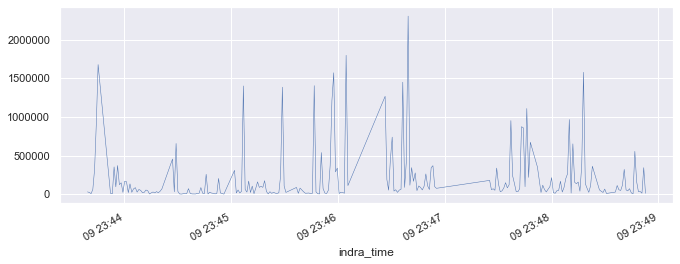

In [96]:
subject_29['delta'].plot(linewidth = 0.5)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score?